# PlotGenerator Demo
A demonstration of PlotGenerator.

---

# Import Modules

---

In [1]:
import numpy as np
import gzip
import sys
try:
    from google.colab import drive
    IN_COLAB = True
    print("On Google CoLab, mount cloud-local file, get our code from GitHub.")
    PATH='/content/drive/'
    #drive.mount(PATH,force_remount=True)  # hardly ever need this
    drive.mount(PATH)    # Google will require login credentials
    DATAPATH=PATH+'My Drive/data/'  # must end in "/"
    import requests
    s = requests.get('https://raw.githubusercontent.com/ShepherdCode/Soars2021/master/SimTools/plot_generator.py')
    with open('plot_generator.py', 'w') as f:
      f.write(s.text)
    from plot_generator import *
except:
    print("CoLab not working. On my PC, use relative paths.")
    IN_COLAB = False
    DATAPATH='../data/'  # must end in "/"
    sys.path.append("..") # append parent dir in order to use sibling dirs
    from SimTools.plot_generator import *

On Google CoLab, mount cloud-local file, get our code from GitHub.
Mounted at /content/drive/


# Load or generate data
For this example we will be generating random data.

---

In [2]:
#Box plot data
DIMENSIONS = 10
DATA_A_COUNT = 10
DATA_B_COUNT = 20

boxplot_data_a = np.random.rand(DIMENSIONS, DATA_A_COUNT)
boxplot_data_b = np.random.rand(DIMENSIONS, DATA_B_COUNT)
print(boxplot_data_b.shape)

#PlotGenerator.box_plot() fails on the data above but works on the data below
#This is weird because it is effectively the same data
#The issue has to do with positions.
#It thinks that data set a will have different positions length than data set b
#This is despite the fact that positions length = DIMENSIONS * NUMBER OF DATA SETS = 10 * 2
#Will need to fix

boxplot_data_a = np.empty(DIMENSIONS, dtype=object)
boxplot_data_b = np.empty(DIMENSIONS, dtype=object)
for d in range(0, DIMENSIONS):
  boxplot_data_a[d] = np.random.rand(DATA_A_COUNT)
  boxplot_data_b[d] = np.random.rand(DATA_B_COUNT)
print(boxplot_data_b.shape)

(10, 20)
(10,)


In [3]:
#Bar plot data
SIZE = 6
barplot_data_a = np.random.rand(SIZE)
barplot_data_b = np.random.rand(SIZE)
barplot_data_c = np.random.rand(SIZE)
#Bar plot data sets should all be one-dimensional arrays.

# Plot the data

---

Set up plot generator

In [4]:
pg = PlotGenerator()
pg.set_text_options(45, 'right', 0, 'center')
#Note: functions such as .set_text_options() and .set_text() will apply to every subsequent plot untill called again.

Create box plot labels and names

In [5]:

title = 'Example Box Plot'
x_label = 'Subsets/Bins'
y_label = 'y'
x_axis_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] #The length must equal the dimensions of the data sets.
y_axis_labels = None
data_set_names = ['A', 'B']

Generate box plot comparing 2 data sets

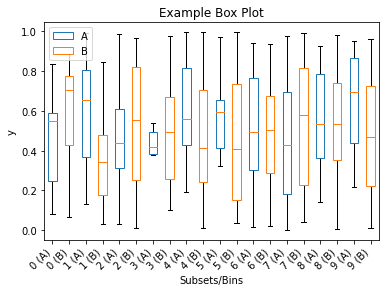

In [6]:
#Box plot
pg.set_text(title, x_label, y_label, x_axis_labels, y_axis_labels)
show_fliers = False #Whether or not outliers should be plotted.
pg.box_plot([boxplot_data_a, boxplot_data_b], data_set_names, show_fliers)

Note how for each label on the x-axis, it has the name of the corresponding data set name.

It does this automatically so all you need to provide is the name of each bin/subset and the name of each set.

It also color codes each data set you are comparing. However, the number of colors is limited. So, by extension the number data sets you can compare is limited. 

Specifically, there are 10 colors so you can compare 10 data sets.

Create bar plot labels and names

In [7]:
title = 'Example Bar Plot'
x_label = 'Subsets/Bins'
y_label = 'y'
x_axis_labels = ['1', '2', '3', '4', '5', '6']
y_axis_labels = None
data_set_names = ['A', 'B', 'C']

Generate bar plot comparing 3 data sets

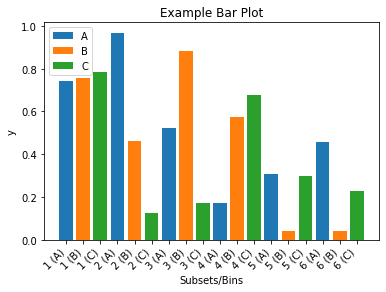

In [8]:
pg.set_text(title, x_label, y_label, x_axis_labels, y_axis_labels)
pg.bar_plot([barplot_data_a, barplot_data_b, barplot_data_c], data_set_names)

# To-do list for improving PlotGenerator

-Fix issue with box plot failing when passed certain data structures

-Prevent overlapping with x axis labels